In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

### Выгрузим данные

In [4]:
boston_dataset = load_boston()
print('boston_dataset_keys = ', boston_dataset.keys())

boston_dataset_keys =  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### Посмотрим на описание данных

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Сформируем датафрейм

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
print("boston.shape = ", boston.shape)
boston.head()

boston.shape =  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Проверим датасет на предмет пропущенных значений

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Нарисуем матрицу корреляций

<AxesSubplot:>

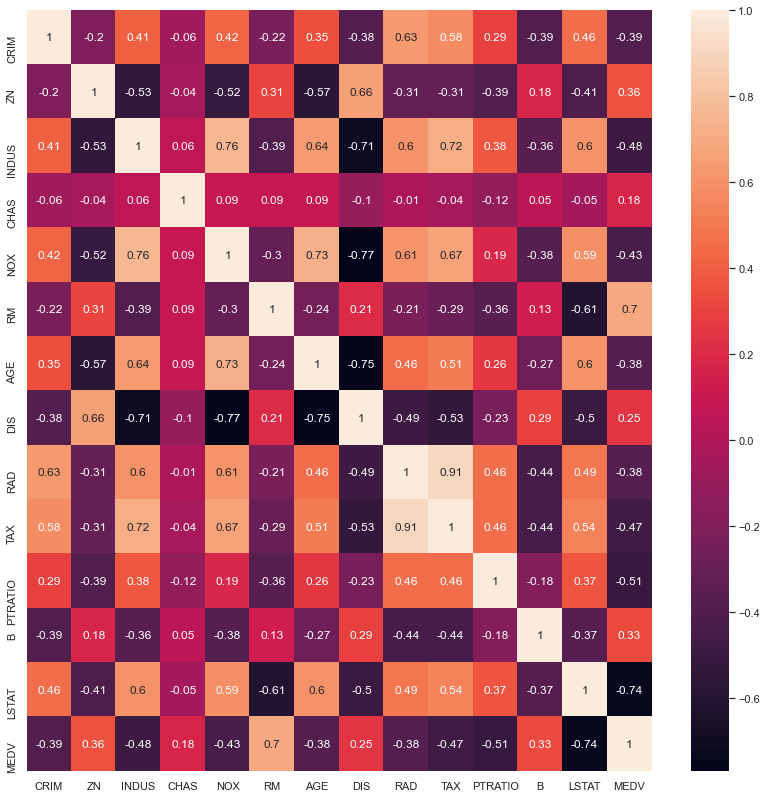

In [8]:
correlation_matrix = boston.corr().round(2)
# fig, ax = plt.subplots(figsize=(16,10))      
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=correlation_matrix, annot=True)

### Посмотрим на распределение целевой метки

/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


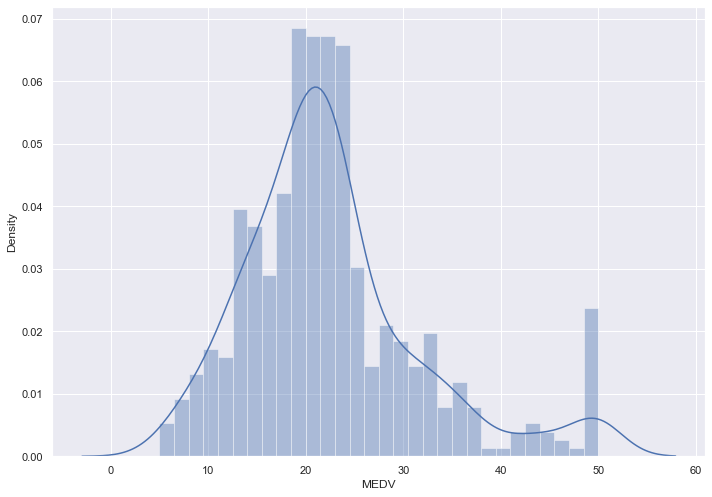

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### Отрисуем зависимости между целевой меткой и наиболее коррелирующими признаками

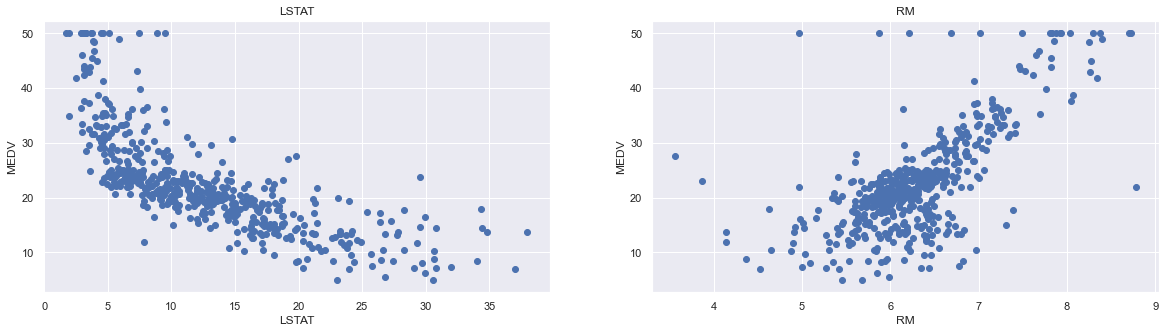

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Разделим данные

In [11]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [12]:
X

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


### Разделим данные на обучающую и тестовую выборки

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Обучим модель линейной регрессии

In [14]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# from sklearn.linear_model import LinearRegression

# lin_model = LinearRegression()
# lin_model.fit(X_train, Y_train)

LinearRegression()

### Посмотрим на результаты

In [15]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 5.6371293350711955
The model performance for testing set
RMSE is 5.137400784702911


### Рассмотрим распределение ошибки

In [16]:
errors = (Y_test-y_test_predict).to_numpy()

/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


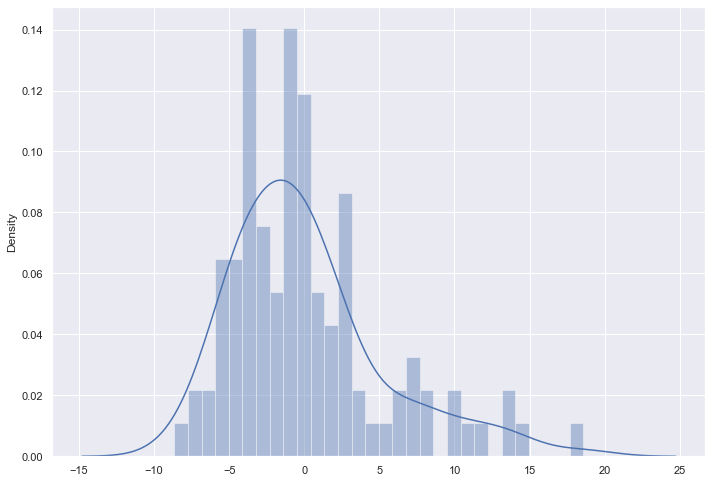

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(errors, bins=30)
plt.show()

# Задание

1) На датасете https://www.kaggle.com/mohansacharya/graduate-admissions построить модель линейной регрессии.
    Попытаться получить хороший результат на отложенной выборке, не переобучиться, поотбирать фичи, попробовать модели с регуляризацией при необходимости

In [18]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [19]:
data.drop(['Serial No.'], axis='columns', inplace=True)

In [20]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [21]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Посмотрим на распределение признаков

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

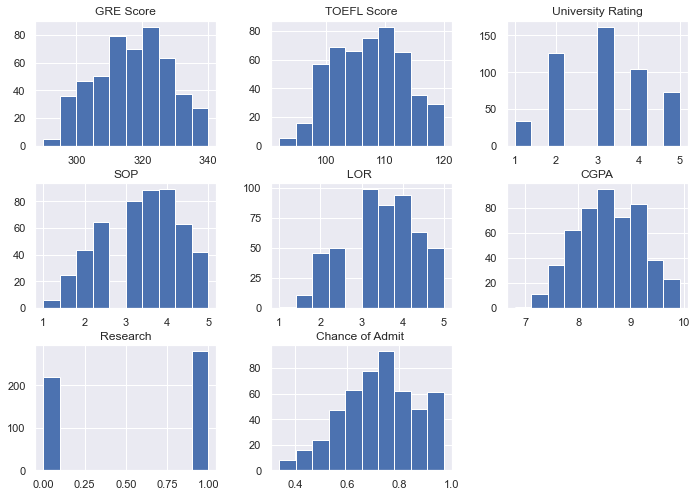

In [22]:
data.hist()

<AxesSubplot:>

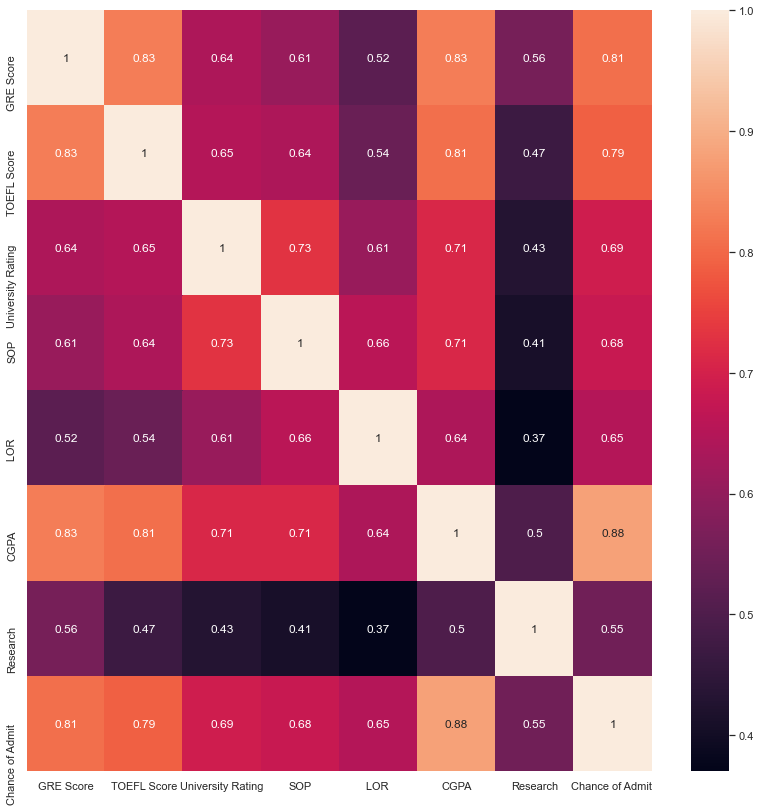

In [23]:
correlation_matrix = data.corr().round(2)
# fig, ax = plt.subplots(figsize=(16,10))      
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=correlation_matrix, annot=True)

### Посмотрим на распределение таргета

/Users/egorkuprasin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


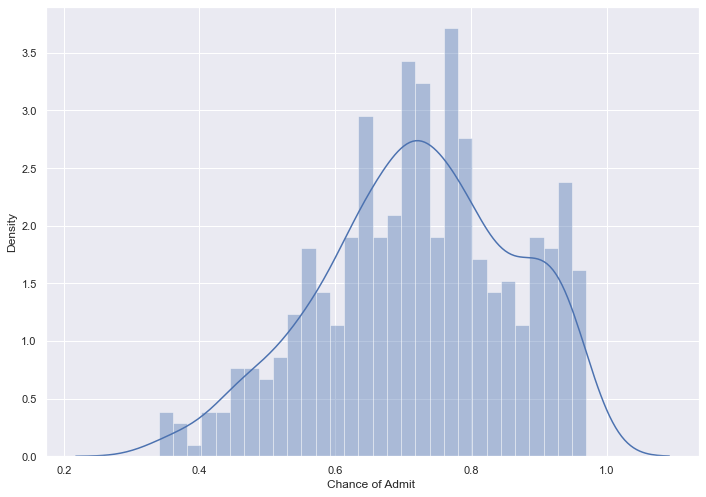

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['Chance of Admit '], bins=30)
plt.show()

### Посмотрим на зависимость таргета и наиболее коррелирующими признаками

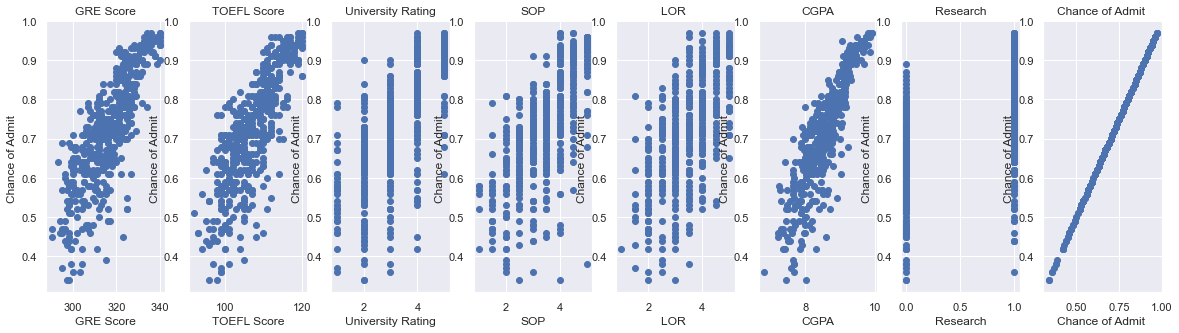

In [25]:
plt.figure(figsize=(20, 5))

features = list(data.columns)

target = data['Chance of Admit ']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Chance of Admit ')

## Как видно из рисунка, у трех признаков: GRE Score, TOEFL Score, CGPA имеется что-то похожее на линейную зависимость

## Обучим нашу модель на этих трез признаках

In [26]:
feature_set1 = ['GRE Score', 'TOEFL Score', 'CGPA']
set1 = data[feature_set1]

In [27]:
set1

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21
...,...,...,...
495,332,108,9.02
496,337,117,9.87
497,330,120,9.56
498,312,103,8.43


In [28]:
X = set1
y = data[data.columns[-1:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=6)

###  Нормализуем наши даные 

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Обучаем модель

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(X_train), np.array(y_train))

Y_predict = model.predict(X_test)

In [31]:
model.score(X_test, y_test)  #  тут score R^2

0.8277687580581419

In [32]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))

Y_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, Y_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 0.0629522853725809
The model performance for testing set
RMSE is 0.06085587789450969


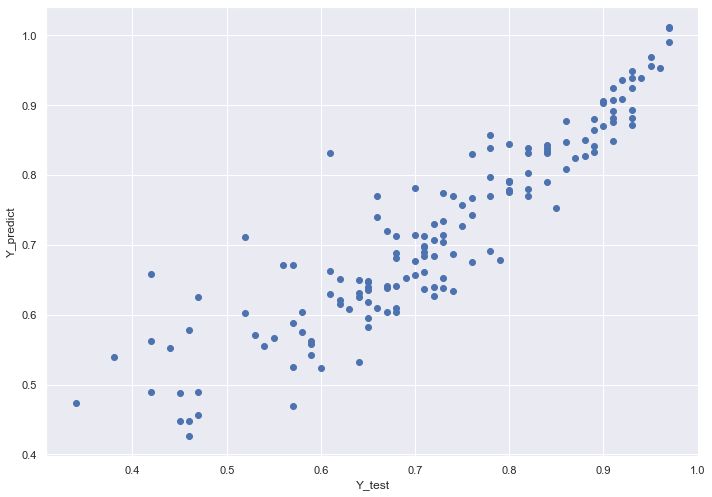

In [33]:
plt.scatter(y_test, Y_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()

### Попробуем добавить регуляризацию

In [34]:
reg = linear_model.Ridge(alpha=.5)
reg.fit(np.array(X_train), np.array(y_train))

Y_predict2 = reg.predict(X_test)

In [35]:
reg.score(X_test, y_test)

0.8278052376706728

In [36]:
lasso = linear_model.Lasso(alpha=.0001)
lasso.fit(np.array(X_train), np.array(y_train))

Y_predict3 = lasso.predict(X_test)

In [37]:
lasso.score(X_test, y_test)

0.827782680781304